**Predict Diabetes From Medical Records**

*Step 1: Import Python Packages*

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

*Step 3: Inspect and Clean Data*

When starting a new data analysis project it is important to inspect, understand, and clean the data.  When inspecting the first ten rows of data one thing that jumps out right away is that there are measurements of zero for both insulin levels and skin thickness.  

In [ ]:
dataset = read_csv('/content/diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It would be a serious medical problem if a patient had an insulin level and skin thickness measurement of zero.  As such, we can conclude that this dataset uses the number zero to represent missing or null data.  Here we can see that as many as half of the rows contain columns with missing data.

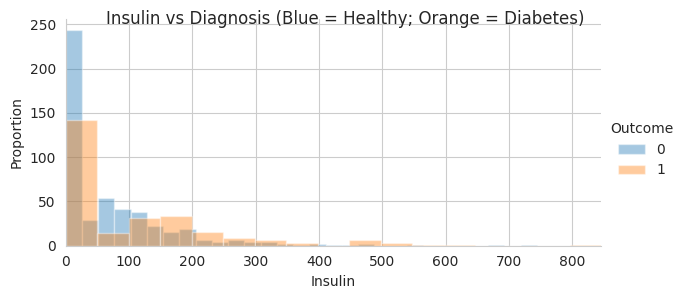

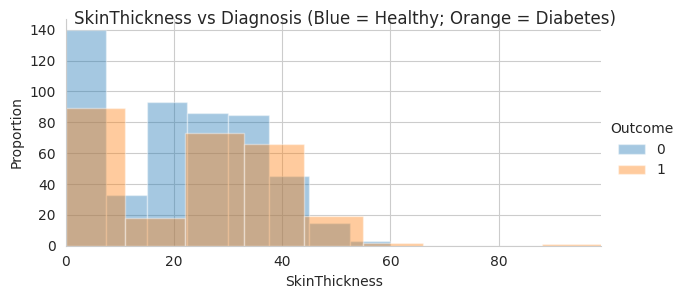

In [ ]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(dataset,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(dataset,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

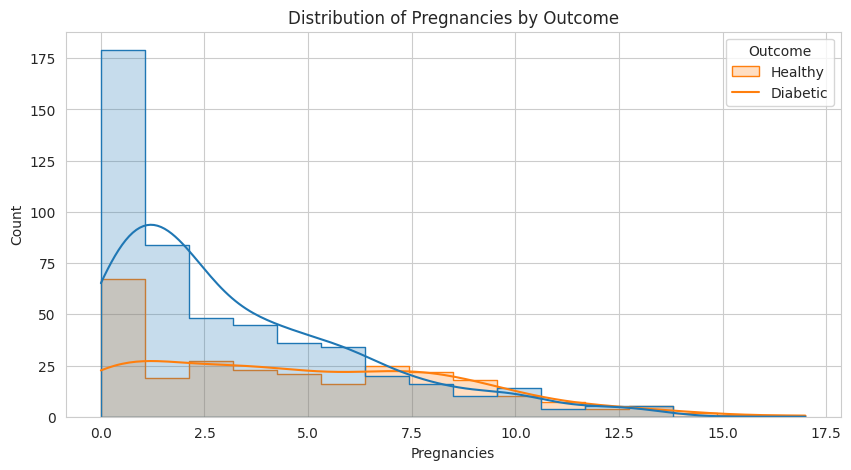

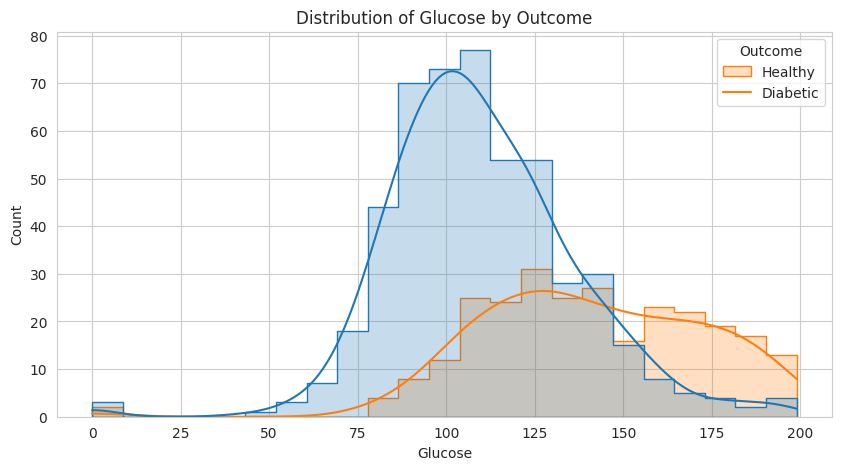

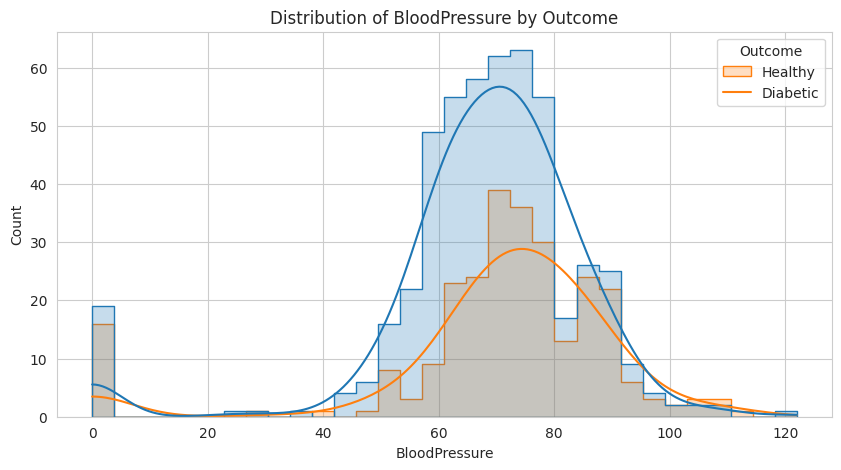

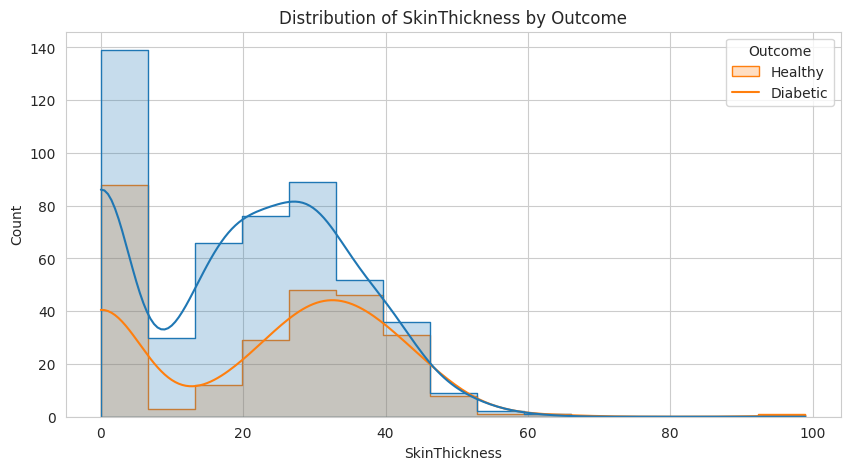

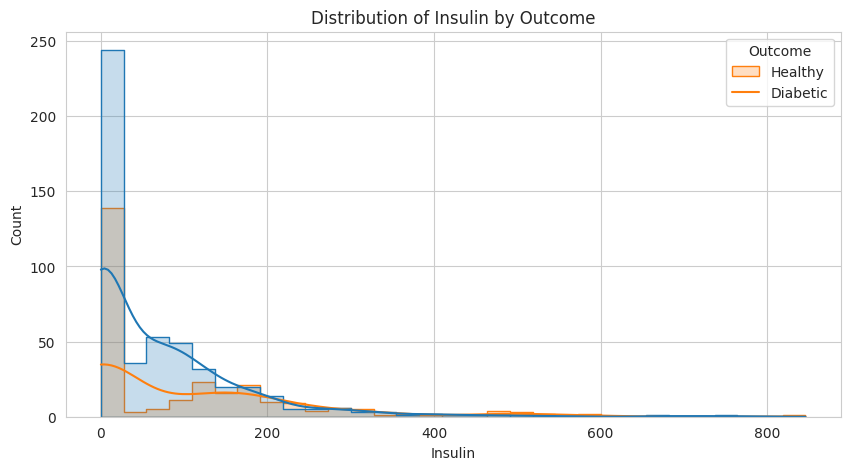

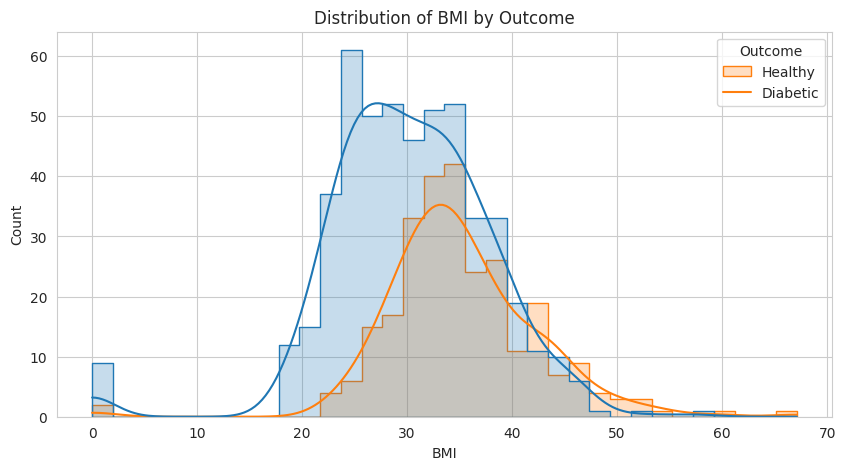

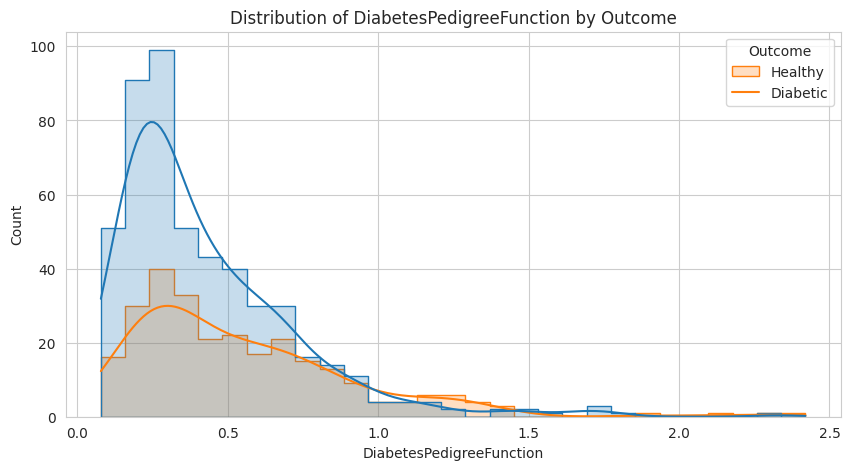

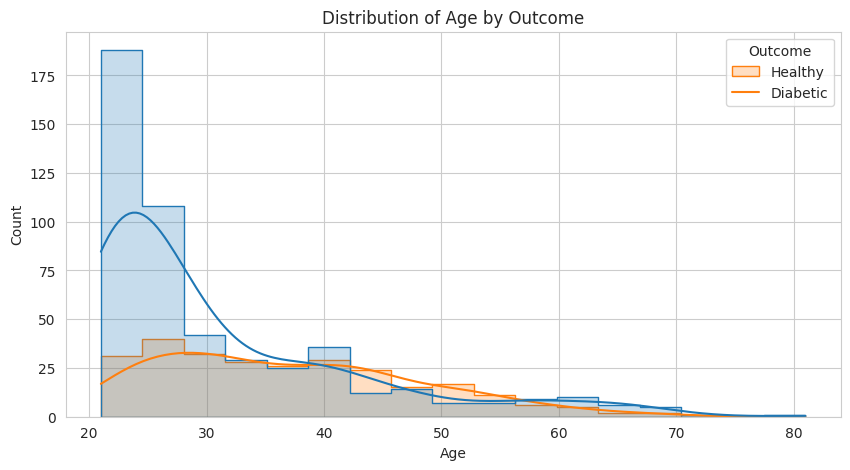

In [ ]:
# Visualize each column
for column in dataset.columns[:-1]:  # Exclude the target column ('Outcome')
    plt.figure(figsize=(10, 5))
    sns.histplot(data=dataset, x=column, hue="Outcome", kde=True, element="step")
    plt.title(f'Distribution of {column} by Outcome')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['Healthy', 'Diabetic'])
    plt.show()

In [ ]:
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [ ]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(((dataset2[:] == 0).sum())/768*100)

# of Rows, # of Columns:  (768, 8)

Column Name              % Null Values

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


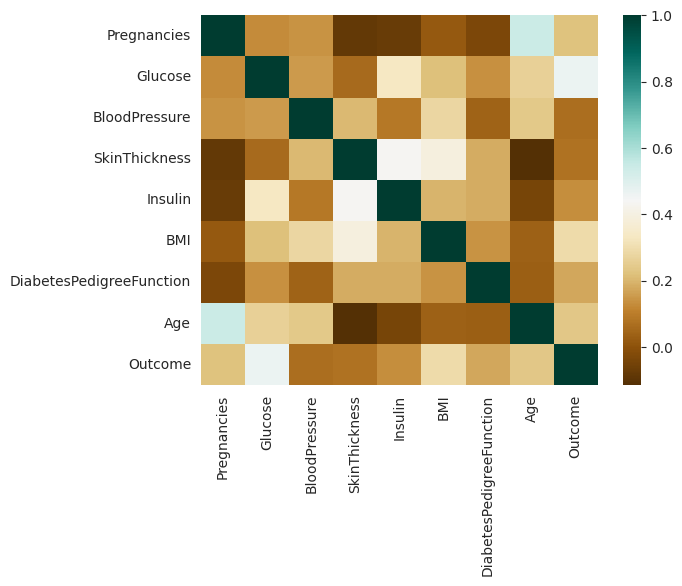

In [ ]:
g = sns.heatmap(dataset.corr(),cmap="BrBG",annot=False)

In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df1=dataset[dataset['SkinThickness']>0]
df1=df1[df1['SkinThickness']<90]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
df2=df1.dropna(how="any")
df2.reset_index(drop=True, inplace=True)

In [ ]:
# we will analysise Glucose with other attributes
#make a copy from cols
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num=cols.copy()
num.remove('Glucose')

In [ ]:
# we will analysise BMI with other attributes
#make a copy from cols
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num=cols.copy()
num.remove('BMI')

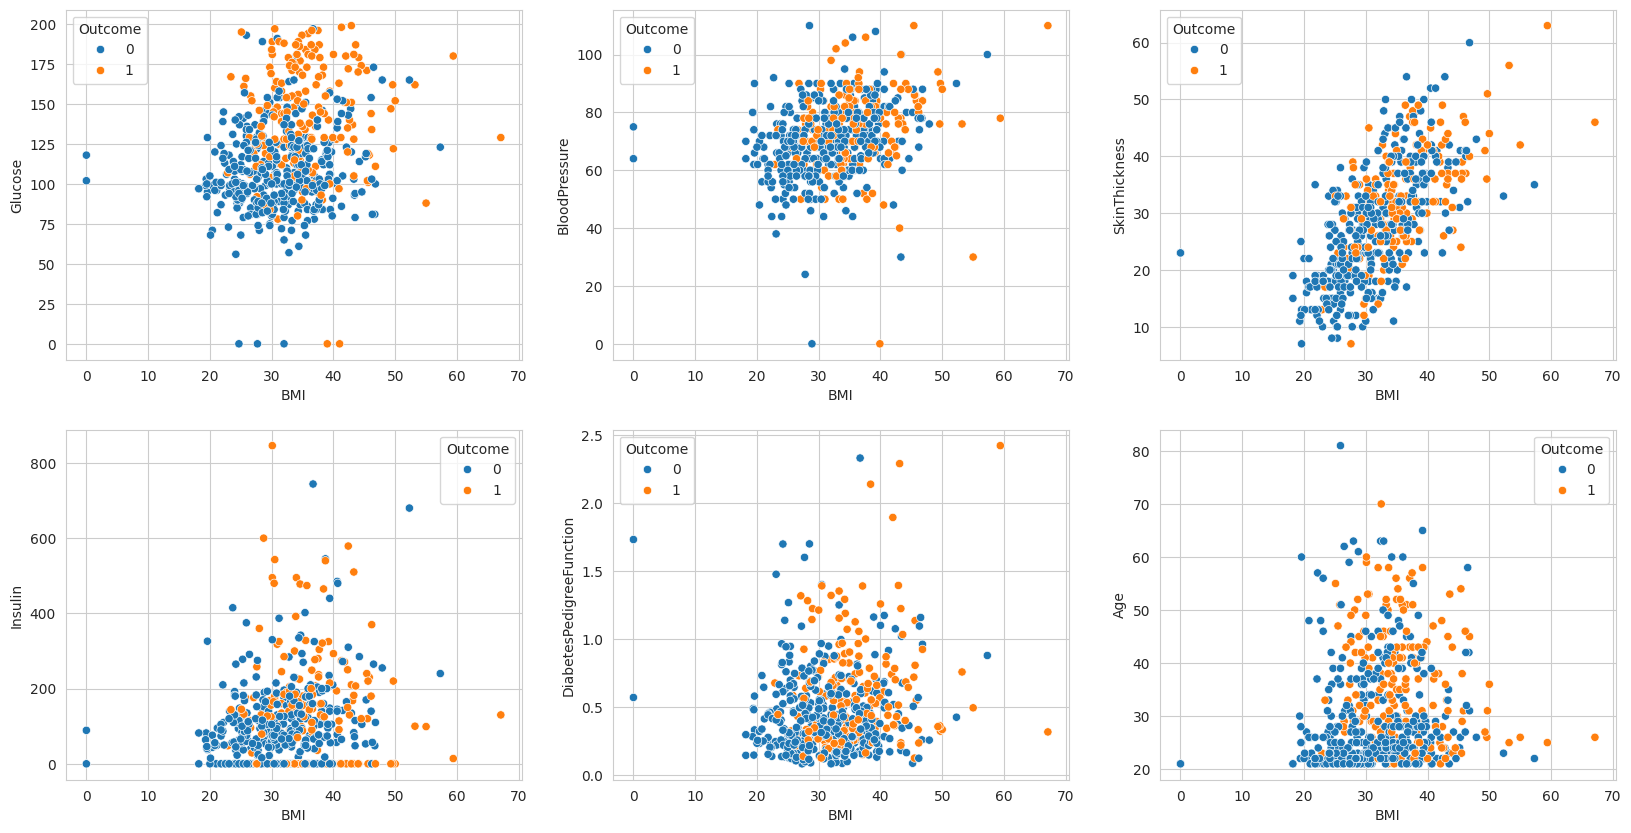

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='BMI',y=col,hue='Outcome',data=df2)

### Model Buiding

### Decision Tree

In [ ]:
x=pd.DataFrame(dataset,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

y=dataset.Outcome.values.reshape(-1,1)# Target variable

In [ ]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=1)

In [ ]:
clf= DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [ ]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7575757575757576


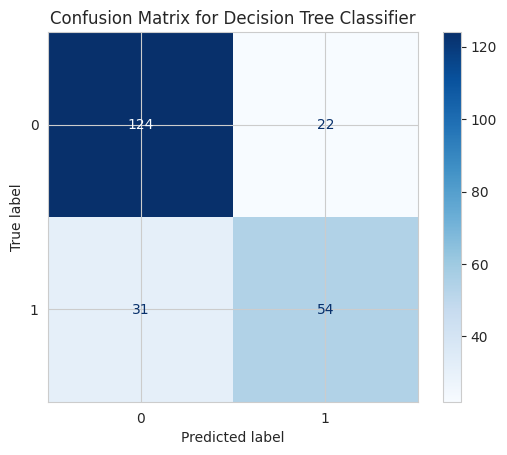

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Make predictions on the test set
y_pred = clf.predict(x_test)
# Print the accuracy, classification report, and confusion matrix in one output
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Healthy', 'Diabetes']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7575757575757576

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.77      0.87      0.82       146
    Diabetes       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231


Confusion Matrix:
 [[127  19]
 [ 37  48]]


## visualization

In [ ]:
from sklearn import tree

In [ ]:
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 129.50
|   |--- feature_4 <= 26.30
|   |   |--- feature_4 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_4 >  9.10
|   |   |   |--- class: 0
|   |--- feature_4 >  26.30
|   |   |--- feature_6 <= 27.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  27.50
|   |   |   |--- class: 0
|--- feature_0 >  129.50
|   |--- feature_4 <= 27.85
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 0
|   |--- feature_4 >  27.85
|   |   |--- feature_0 <= 158.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  158.50
|   |   |   |--- class: 1



In [ ]:
with open('decision_tree.log' ,'w') as fout:
    fout.write (text_representation)

## white box one

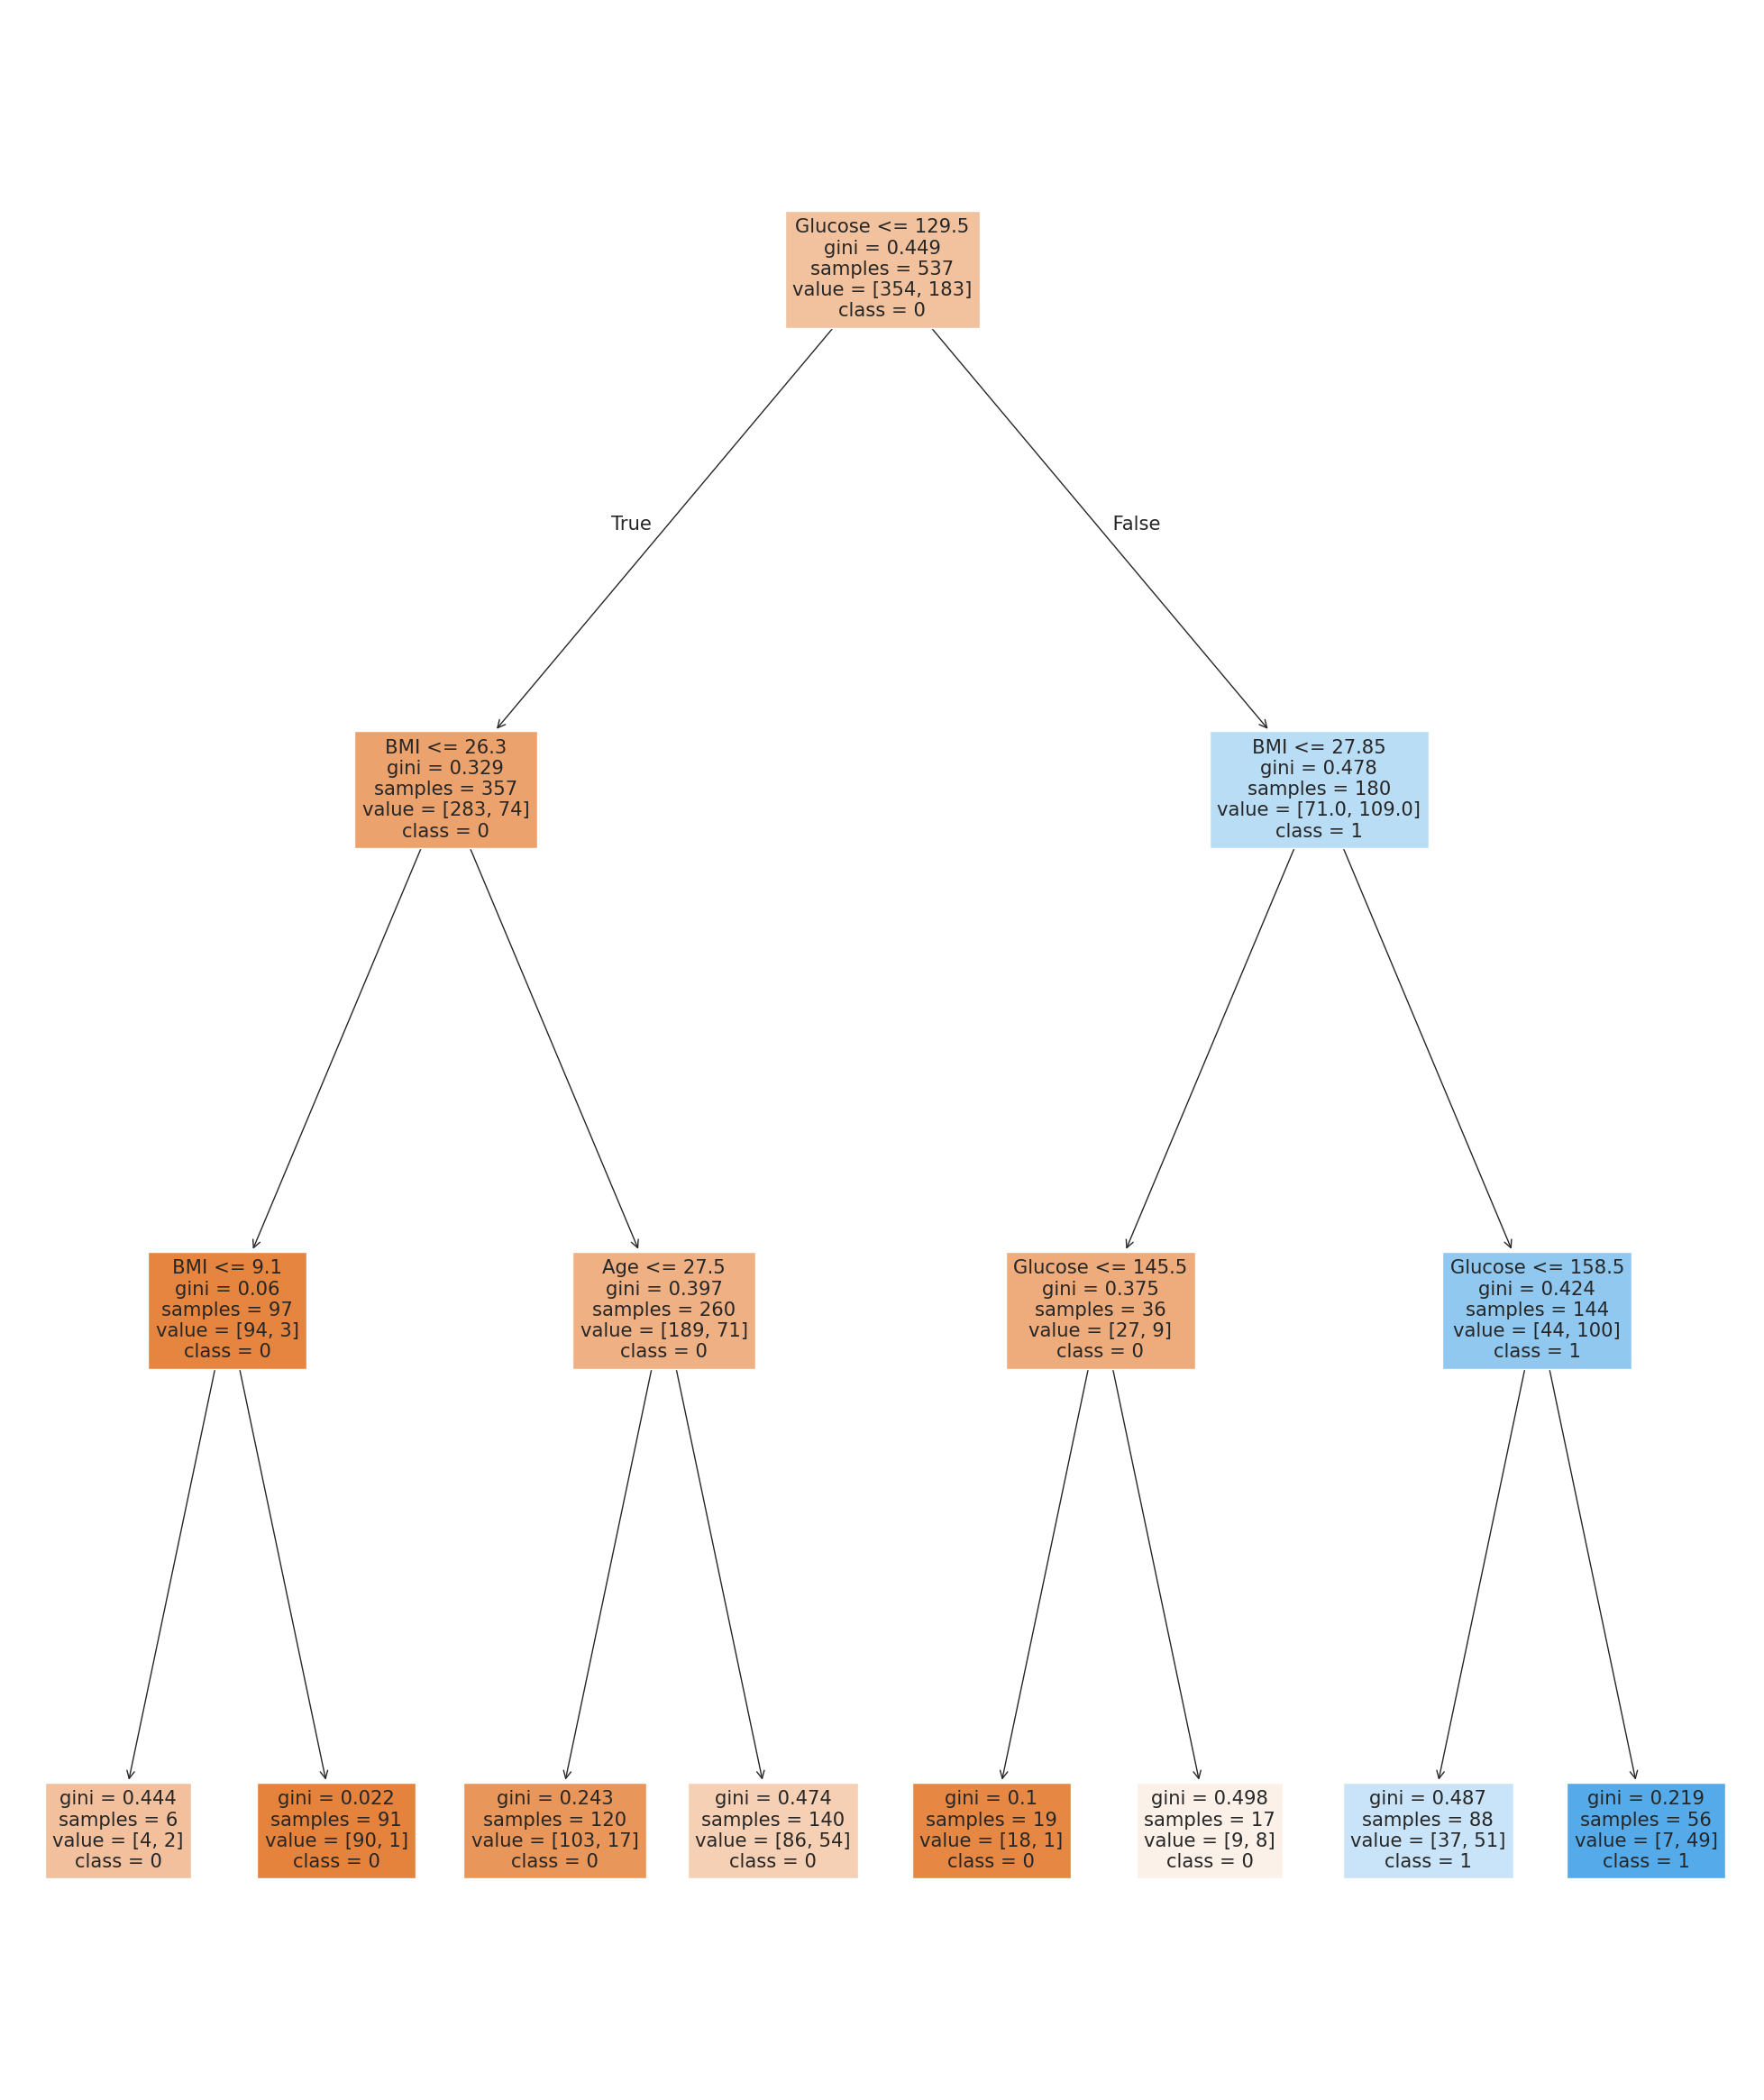

In [ ]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree1.png')



In [ ]:
clf= DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [ ]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7705627705627706


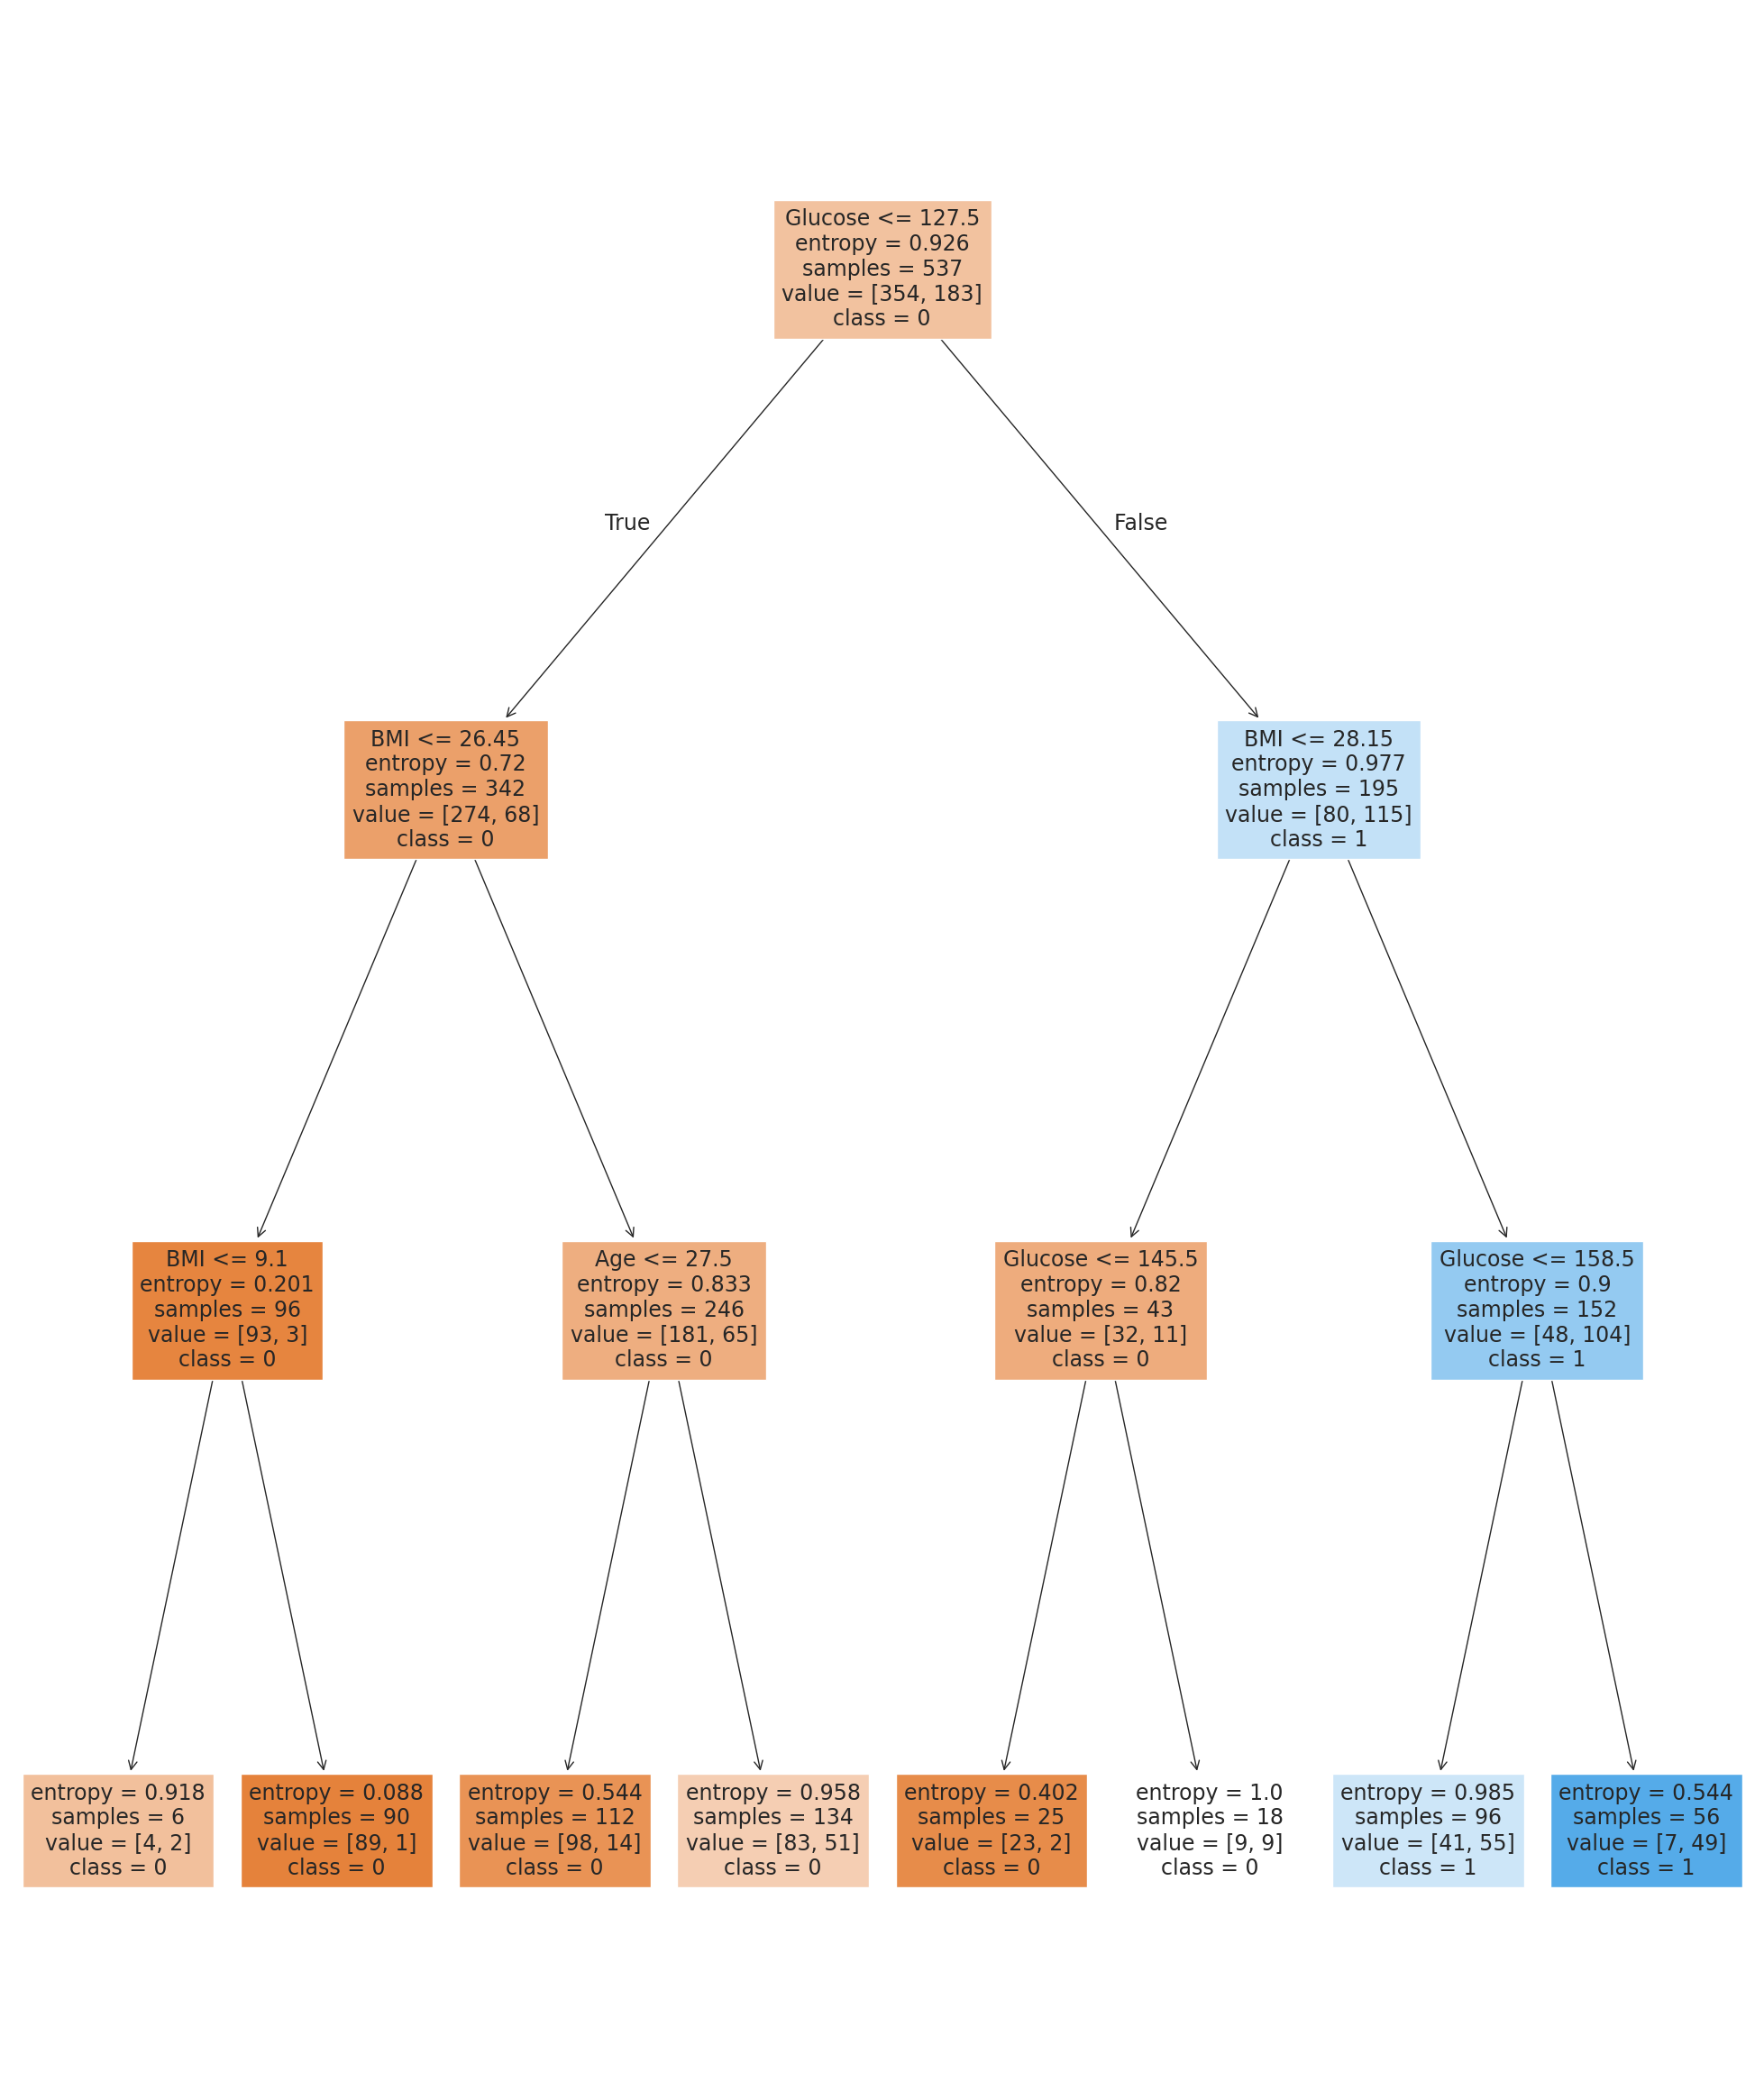

In [ ]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree2.png')